El objetivo de este ejemplo es visualizar de manera grafica el cambion en la tendiencia de nacimientos por parte de madres adolescentes en Costa Rica, utilizando los datos proporcionados por el INEC

El unico grafico que es posible generar mediante la platadorma del INEC es este:
<img src="./graficoFeo.jpg" align = "center">
El cual no presenta una visualizacion clara de la informacion, debiado a esto utilizaremos Pandas y Seavorn para procesar y graficar los datos.

In [1]:
#imports
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()


In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [3]:
# Cargar los datos del archivo
nacimientos = pd.read_csv('Acomodado.csv', skiprows=0)
nacimientos

,Ano,Edad de la madre,Nacimientos
0,2000,0,279.0
1,2000,10,1.0
2,2000,11,0.0
3,2000,12,9.0
4,2000,13,101.0
5,2000,14,500.0
6,2000,15,1313.0
7,2000,16,2312.0
8,2000,17,3463.0
9,2000,18,4097.0


In [4]:
print(type(nacimientos))
print(nacimientos)

<class 'pandas.core.frame.DataFrame'>
      Ano  Edad de la madre  Nacimientos
0    2000                 0        279.0
1    2000                10          1.0
2    2000                11          0.0
3    2000                12          9.0
4    2000                13        101.0
5    2000                14        500.0
6    2000                15       1313.0
7    2000                16       2312.0
8    2000                17       3463.0
9    2000                18       4097.0
10   2000                19       4814.0
11   2000                20       4869.0
12   2000                21       4551.0
13   2000                22       4662.0
14   2000                23       4525.0
15   2000                24       3958.0
16   2000                25       3904.0
17   2000                26       3740.0
18   2000                27       3580.0
19   2000                28       3476.0
20   2000                29       3202.0
21   2000                30       3130.0
22   2000          

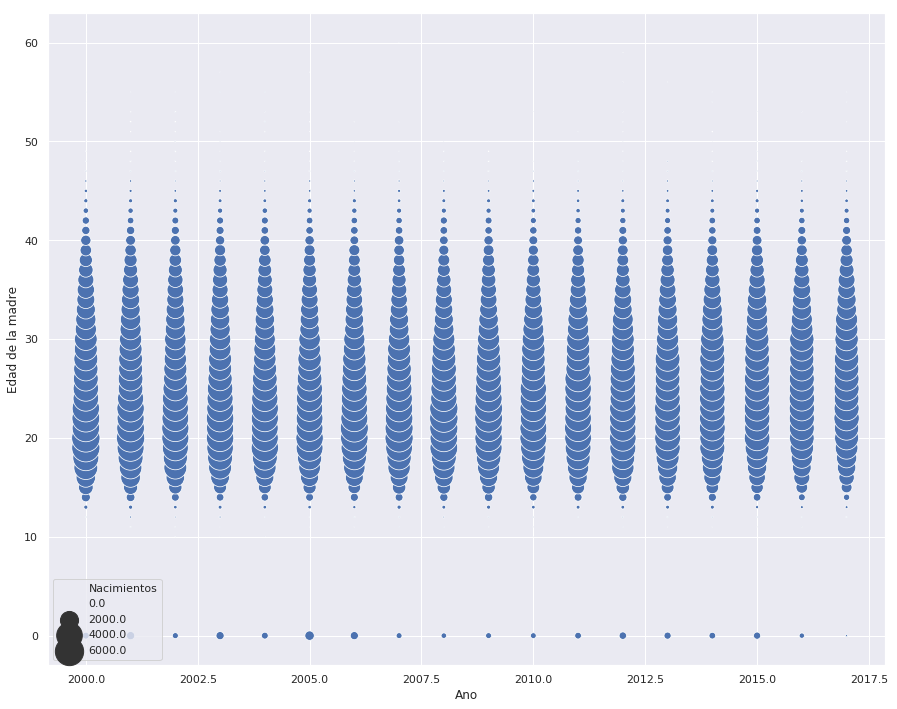

In [5]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Ano", y="Edad de la madre", size="Nacimientos",
                     palette=cmap, sizes=(0, 800),
                     data=nacimientos)


In [6]:
#a informacion contiene datos no validos como edad = 0
nacimientos = nacimientos.loc[ nacimientos['Edad de la madre']>0 ]
nacimientos.head(20)

,Ano,Edad de la madre,Nacimientos
1,2000,10,1.0
2,2000,11,0.0
3,2000,12,9.0
4,2000,13,101.0
5,2000,14,500.0
6,2000,15,1313.0
7,2000,16,2312.0
8,2000,17,3463.0
9,2000,18,4097.0
10,2000,19,4814.0


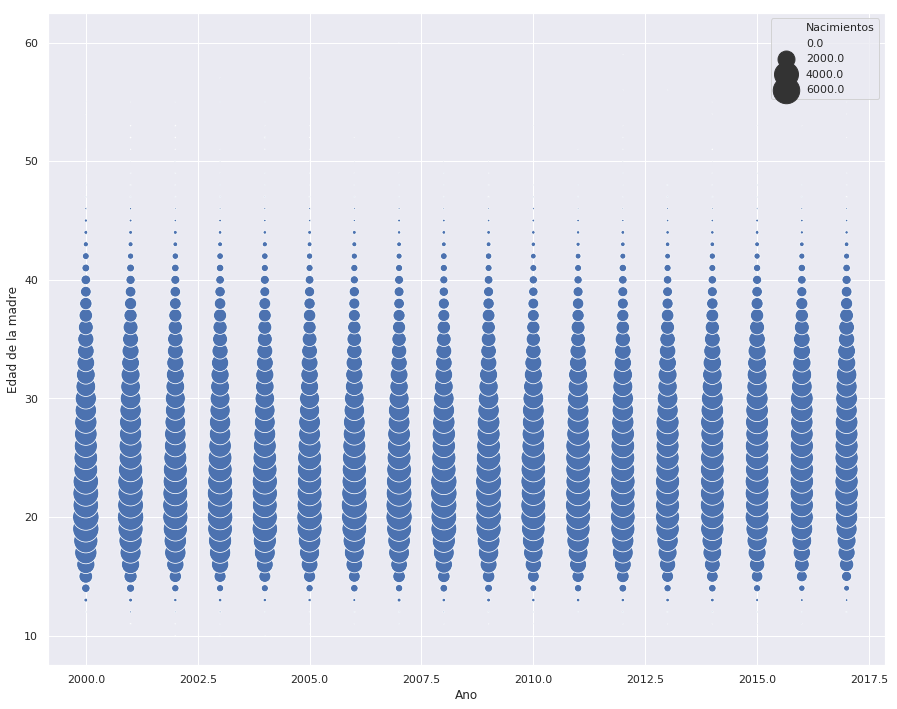

In [7]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Ano", y="Edad de la madre", size="Nacimientos",
                     palette=cmap, sizes=(0, 700),
                     data=nacimientos)


In [8]:
#Total nacimientos con madres menores de edad
nacimientos_menores = nacimientos.loc[ nacimientos['Edad de la madre']<18 ].groupby(['Ano'])['Nacimientos'].sum().reset_index()
nacimientos_menores.head(20)

,Ano,Nacimientos
0,2000,7699.0
1,2001,7253.0
2,2002,6824.0
3,2003,6794.0
4,2004,6491.0
5,2005,6322.0
6,2006,6184.0
7,2007,6587.0
8,2008,6750.0
9,2009,6604.0


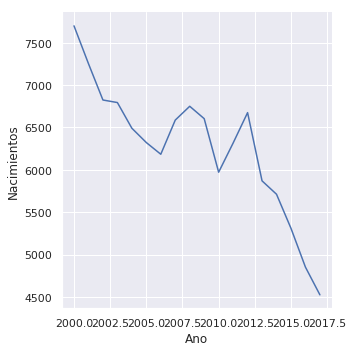

In [9]:
sns.relplot(x="Ano", y="Nacimientos", ci=None, kind="line"
            , data=nacimientos_menores)

In [10]:
nacimientos['Rango de edad'] = ['Mayor' if x > 17 else 'Menor' for x in nacimientos['Edad de la madre']]

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
nacimientos.head(20)

,Ano,Edad de la madre,Nacimientos,Rango de edad
1,2000,10,1.0,Menor
2,2000,11,0.0,Menor
3,2000,12,9.0,Menor
4,2000,13,101.0,Menor
5,2000,14,500.0,Menor
6,2000,15,1313.0,Menor
7,2000,16,2312.0,Menor
8,2000,17,3463.0,Menor
9,2000,18,4097.0,Mayor
10,2000,19,4814.0,Mayor


In [12]:
nacimientos_totales = nacimientos.groupby(['Ano', "Rango de edad"])['Nacimientos'].sum().reset_index()
nacimientos_totales.head(50)

,Ano,Rango de edad,Nacimientos
0,2000,Mayor,70200.0
1,2000,Menor,7699.0
2,2001,Mayor,68732.0
3,2001,Menor,7253.0
4,2002,Mayor,64100.0
5,2002,Menor,6824.0
6,2003,Mayor,65741.0
7,2003,Menor,6794.0
8,2004,Mayor,65474.0
9,2004,Menor,6491.0


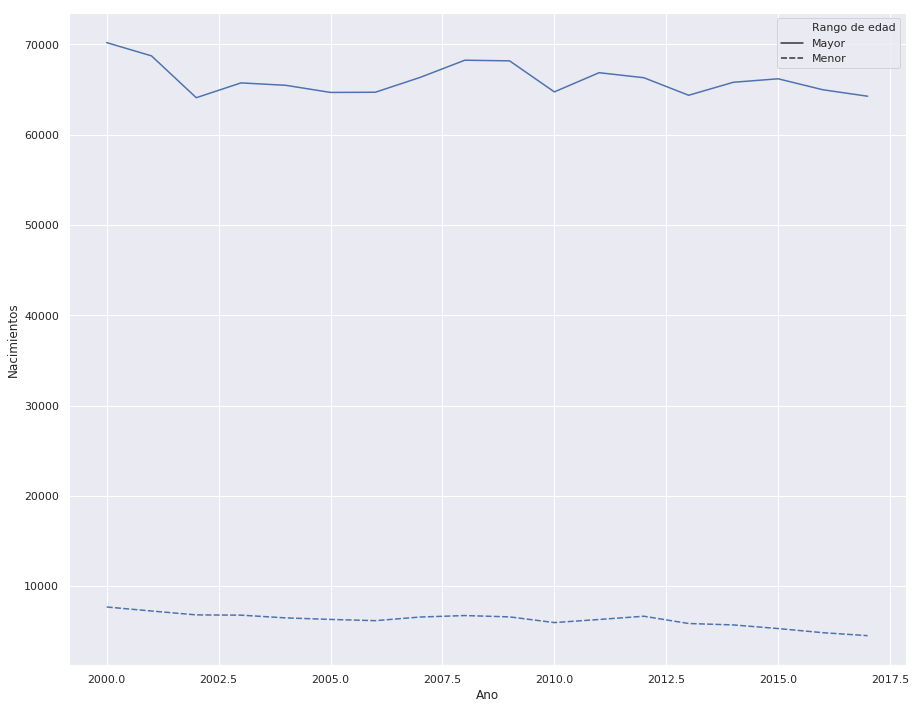

In [13]:
sns.lineplot(x="Ano", y="Nacimientos", style="Rango de edad",
             data=nacimientos_totales)

In [14]:
nacimientos= nacimientos.drop("Rango de edad",1)
nacimientos.head()

,Ano,Edad de la madre,Nacimientos
1,2000,10,1.0
2,2000,11,0.0
3,2000,12,9.0
4,2000,13,101.0
5,2000,14,500.0


In [15]:
nacimientos_decada = nacimientos
nacimientos_decada["Decada edad madre"]=  nacimientos_decada["Edad de la madre"]//10*10
nacimientos_decada = nacimientos_decada.drop("Edad de la madre",1).groupby(['Ano', 'Decada edad madre'])['Nacimientos'].sum().reset_index()
nacimientos_decada.head(20)

,Ano,Decada edad madre,Nacimientos
0,2000,10,16610.0
1,2000,20,40467.0
2,2000,30,19024.0
3,2000,40,1793.0
4,2000,50,5.0
5,2000,60,0.0
6,2001,10,15461.0
7,2001,20,40000.0
8,2001,30,18835.0
9,2001,40,1676.0


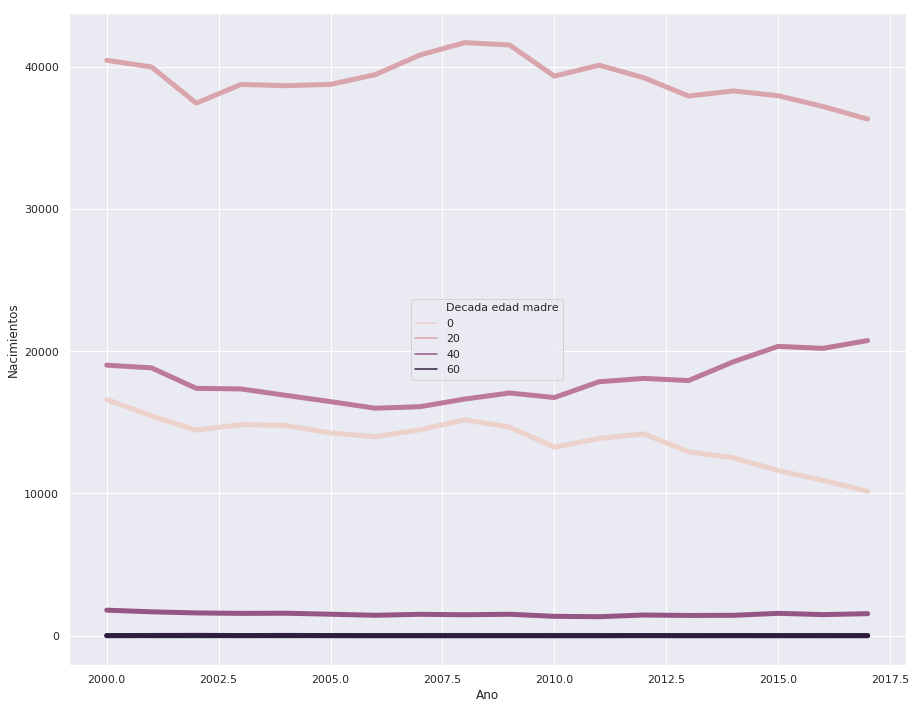

In [16]:
sns.set_palette("husl")
sns.lineplot(x="Ano", y="Nacimientos", hue="Decada edad madre", data=nacimientos_decada, linewidth=5)